# ECAR Simulation

Run the cell below to get all the imports settled.

In [2]:
# package imports
import numpy as np
import matplotlib.pyplot as plt

#file imports
import constants as c
import dae
import system as s

Run the cell below to model the system using the initial conditions you write in.
(The preset values are from a previous experiment.)

In [3]:
dose_time = 0
mix_time = 50
dose_rate = 7
dose_load = 100
initial_conc_vector = np.array([
    1e-6 / c.mm_As, 149e-6 / c.mm_As, 0.22e-3 / c.mm_P, 12e-3 / c.mm_Si, 0, 0,
    c.O2_saturation_20C, 149e-6 / c.mm_As, 6.6
]) # required to make this a NumPy Array

ecar_system = s.ECAR(dose_time, mix_time, dose_rate, dose_load,
                     initial_conc_vector)
time_list, conc_list, conc_td_list = ecar_system.model()

Final Run Statistics: ECAR Problem without concentration checks 

 Number of steps                                 : 56
 Number of function evaluations                  : 726
 Number of Jacobian evaluations                  : 50
 Number of function eval. due to Jacobian eval.  : 450
 Number of error test failures                   : 6
 Number of LU decompositions                     : 78

Solver options:

 Solver                  : Radau5 (implicit)
 Tolerances (absolute)   : 1e-07
 Tolerances (relative)   : 1e-05

Simulation interval    : 0.0 - 3857.1428571428573 seconds.
Elapsed simulation time: 0.0673683519999031 seconds.


Run the cell below to plot the concentration fractions over time. You can tune the parameters of the plotter however you want.

In [4]:
# matplotlib helper function 
# run this for any of the other scripts to work
plotter = lambda ax, x, y, col: ax.plot(x, y, color=col, marker='o', markersize='1', linestyle='solid')


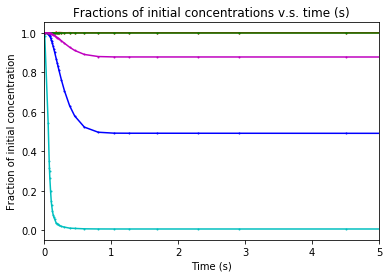

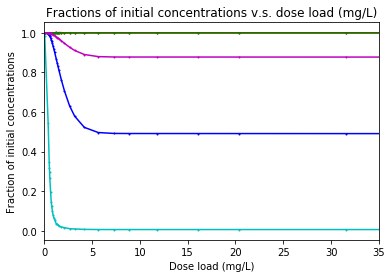

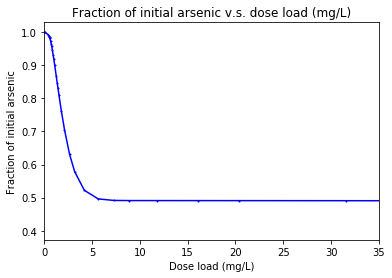

In [5]:
# plotting fractions of iniital concentrations vs time (of both mixing and dosing)
fig, ax = plt.subplots(1, 1)

as3_dissolved_frac_list = np.array([conc[0] / initial_conc_vector[0] for conc in conc_list])
as3_tot_frac_list = as3_dissolved_frac_list + np.array([c.adsorbed_species_vector(conc)[0] / initial_conc_vector[0] for conc in conc_list])
p_frac_list = np.array([conc[2] / initial_conc_vector[2] for conc in conc_list])
si_frac_list = np.array([conc[3] / initial_conc_vector[3] for conc in conc_list])
as5_tot_frac_list = np.array([conc[7] / initial_conc_vector[7] for conc in conc_list])

plotter(ax, time_list, as3_dissolved_frac_list, 'b')
plotter(ax, time_list, as3_tot_frac_list, 'r')
plotter(ax, time_list, as5_tot_frac_list, 'g')
plotter(ax, time_list, p_frac_list, 'c')
plotter(ax, time_list, si_frac_list, 'm')

ax.set_title('Fractions of initial concentrations v.s. time (s)')
ax.set_ylabel('Fraction of initial concentration')
ax.set_xlabel('Time (s)')

ax.set_xlim(0,5)

plt.show()

# plotting fractions of initial concentrations vs Fe dosage (until max dosage load)
if not c.approx(ecar_system.dose_time, 0):
    fig, ax1 = plt.subplots(1, 1)
    time_final = max([i for i in range(time_list.size) if time_list[i] <= ecar_system.dose_time_sec])
    time_dose_list_adj = time_list[:time_final] * dose_rate
    conc_dose_list = conc_list[:time_final]
    conc_td_dose_list = conc_td_list[:time_final]
    
    as3_dissolved_frac_dose_list = np.array([conc[0] / initial_conc_vector[0] for conc in conc_dose_list])
    as3_tot_frac_dose_list = as3_dissolved_frac_list[:time_final] + np.array([c.adsorbed_species_vector(conc)[0] / initial_conc_vector[0] for conc in conc_dose_list])
    p_frac_dose_list = np.array([conc[2] / initial_conc_vector[2] for conc in conc_dose_list])
    si_frac_dose_list = np.array([conc[3] / initial_conc_vector[3] for conc in conc_dose_list])
    as5_tot_frac_dose_list = np.array([conc[7] / initial_conc_vector[7] for conc in conc_dose_list])
    
    plotter(ax1, time_dose_list_adj, as3_dissolved_frac_dose_list, 'b')
    plotter(ax1, time_dose_list_adj, as3_tot_frac_dose_list, 'r')
    plotter(ax1, time_dose_list_adj, as5_tot_frac_dose_list, 'g')
    plotter(ax1, time_dose_list_adj, p_frac_dose_list, 'c')
    plotter(ax1, time_dose_list_adj, si_frac_dose_list, 'm')

    
    ax1.set_title(
        'Fractions of initial concentrations v.s. dose load (mg/L)')
    ax1.set_ylabel('Fraction of initial concentrations')
    ax1.set_xlabel('Dose load (mg/L)')
    
    ax1.set_xlim(0, 35)
    
    plt.show()
    
    fig, ax2 = plt.subplots(1,1)
    
    plotter(ax2, time_dose_list_adj, as3_dissolved_frac_dose_list, 'b')
    
    ax2.set_title('Fraction of initial arsenic v.s. dose load (mg/L)')
    ax2.set_ylabel('Fraction of initial arsenic')
    ax2.set_xlabel('Dose load (mg/L)')
    
    ax2.set_xlim(0, 35)
   
    plt.show() 
